# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter


from scipy import sparse

C:\Users\Sagar\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:05<00:00, 1671.29it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also

In [20]:
# similarly you can preprocess the titles also
print(project_data['project_title'].values[0])
print('-'*100)
print(project_data['project_title'].values[289])
print('-'*100)
print(project_data['project_title'].values[1090])
print('-'*100)
print(project_data['project_title'].values[7])
print('-'*100)
print(project_data['project_title'].values[15000])
print('-'*100)
print(project_data['project_title'].values[15468])

Educational Support for English Learners at Home
----------------------------------------------------------------------------------------------------
Learning to Shred!
----------------------------------------------------------------------------------------------------
Coding: Bee-Bots to Discover Computer Science
----------------------------------------------------------------------------------------------------
It's the 21st Century
----------------------------------------------------------------------------------------------------
\r\nThe \"i\" Classroom
----------------------------------------------------------------------------------------------------
Mission: Target Learning


In [21]:
# let's decontract the titles by using the decontracted fuinction defined above
decon = decontracted(project_data['project_title'].values[7])
print(decon)

It is the 21st Century


In [22]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sen = project_data['project_title'].values[15000].replace('\\r',' ')
sen = sen.replace('\\"',' ')
sen = sen.replace('\\n',' ')
print(sen)

  The  i  Classroom


In [23]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', project_data['project_title'].values[15468])
print(sent)

Mission Target Learning


In [24]:
#let's combine all above and apply to all the data points
preprocessed_title = []
for sentances in tqdm(project_data['project_title'].values):
    sentance = decontracted(sentances)
    sentance = sentance.replace("\\r",' ')
    sentance = sentance.replace("\\n",' ')
    sentance = sentance.replace('\\"',' ')
    sentance = re.sub('[^A-Za-z0-9]+',' ',sentance)
    
    sentance = ' '.join(e for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_title.append(sentance.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 38813.63it/s]


In [25]:
preprocessed_title[20000]

'need move input'

## 1.5 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [27]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

__ Computing Sentiment Scores__

In [28]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = []
for es in tqdm(preprocessed_essays):
    ss.append(sid.polarity_scores(es))

senti_scores = pd.DataFrame(ss)

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:01<00:00, 602.63it/s]


# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

In [29]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

In [30]:
senti_scores.columns

Index(['compound', 'neg', 'neu', 'pos'], dtype='object')

In [31]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved','Unnamed: 0','id','teacher_id','project_essay_1','project_essay_2','project_essay_3','project_essay_4','project_resource_summary','project_title','essay'], axis=1)
X['essay'] = preprocessed_essays
X['title'] = preprocessed_title
X[['compound','neg','neu','pos']] = senti_scores[['compound', 'neg', 'neu', 'pos']]
X['essay_cnt'] = [len(i.split()) for i in preprocessed_essays]
X['title_cnt'] = [len(i.split()) for i in preprocessed_title]

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3>2.2.1 encoding categorical features: School State</h3>

In [33]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)

X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>2.2.2 encoding categorical features: teacher_prefix</h3>

In [34]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype('U'))

X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 6) (49041,)
(24155, 6) (24155,)
(36052, 6) (36052,)
['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']


<h3>2.2.3 encoding categorical features: clean_categories</h3>

In [35]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)

X_train_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cat_ohe.shape, y_train.shape)
print(X_cv_cat_ohe.shape, y_cv.shape)
print(X_test_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h3>2.2.4 encoding categorical features: clean_subcategories</h3>

In [36]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcat_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcat_ohe.shape, y_train.shape)
print(X_cv_subcat_ohe.shape, y_cv.shape)
print(X_test_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [37]:
print(X_cv_cat_ohe.toarray())

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


<h3>2.2.5 encoding categorical features: project_grade_category</h3>

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbl = LabelEncoder()
lbl.fit(X_train['project_grade_category'].values)

X_train_grade_lbl = lbl.transform(X_train['project_grade_category'].values)
X_cv_grade_lbl = lbl.transform(X_cv['project_grade_category'].values)
X_test_grade_lbl = lbl.transform(X_test['project_grade_category'].values)

ohe = OneHotEncoder()
ohe.fit(X_train_grade_lbl.reshape(-1,1))
X_train_grade_ohe = ohe.transform(X_train_grade_lbl.reshape(-1,1))
X_cv_grade_ohe = ohe.transform(X_cv_grade_lbl.reshape(-1,1))
X_test_grade_ohe = ohe.transform(X_test_grade_lbl.reshape(-1,1))

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)

print("="*100)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)


In [39]:
print(X_cv_grade_ohe.toarray())

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


<h3>2.2.6 Scaling Numerical features: Price</h3>

In [40]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train['price'].values.reshape(-1,1))
X_train_price_std = std.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_std = std.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_std = std.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_std, y_train.shape)
print(X_cv_price_std, y_cv.shape)
print(X_test_price_std, y_test.shape)

print("="*100)

After vectorizations
[[-0.34654962]
 [-0.63674651]
 [-0.11037967]
 ...
 [-0.39254591]
 [-0.34942799]
 [-0.1274196 ]] (49041,)
[[-0.43655614]
 [-0.43292939]
 [-0.45840294]
 ...
 [ 0.50412275]
 [ 1.14251561]
 [-0.66610585]] (24155,)
[[-0.11625154]
 [-0.43292939]
 [-0.16181607]
 ...
 [-0.19120419]
 [ 0.00973456]
 [ 2.83424661]] (36052,)


<h3>2.2.7 Scaling Numerical features: teacher_number_of_previously_posted_projects </h3>

In [41]:
std = StandardScaler()
std.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_teach_prev_std = std.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teach_prev_std = std.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teach_prev_std = std.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teach_prev_std, y_train.shape)
print(X_cv_teach_prev_std, y_cv.shape)
print(X_test_teach_prev_std, y_test.shape)

print("="*100)

After vectorizations
[[-0.36946107]
 [-0.2588501 ]
 [-0.40633139]
 ...
 [-0.40633139]
 [-0.36946107]
 [-0.33259075]] (49041,)
[[ 3.39131185]
 [-0.40633139]
 [-0.33259075]
 ...
 [ 0.66290797]
 [-0.33259075]
 [-0.22197978]] (24155,)
[[-0.33259075]
 [-0.22197978]
 [-0.36946107]
 ...
 [ 1.62153636]
 [-0.40633139]
 [-0.33259075]] (36052,)


<h3>2.2.8 Scaling Numerical features: Quantity</h3>

In [42]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train['quantity'].values.reshape(-1,1))
X_train_quan_std = std.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quan_std = std.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quan_std = std.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quan_std, y_train.shape)
print(X_cv_quan_std, y_cv.shape)
print(X_test_quan_std, y_test.shape)

print("="*100)

After vectorizations
[[-0.42436251]
 [-0.23174397]
 [-0.61698105]
 ...
 [-0.57845734]
 [-0.53993364]
 [-0.57845734]] (49041,)
[[-4.24362511e-01]
 [-2.70267680e-01]
 [-6.01724277e-04]
 ...
 [ 1.77148884e+00]
 [ 1.14969399e-01]
 [ 1.14969399e-01]] (24155,)
[[-0.57845734]
 [-0.23174397]
 [-0.46288622]
 ...
 [-0.27026768]
 [ 0.23054052]
 [-0.61698105]] (36052,)


<h3>2.2.9 Scaling Numerical features: Title Count</h3>

In [43]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train['title_cnt'].values.reshape(-1,1))
X_train_title_cnt_std = std.transform(X_train['title_cnt'].values.reshape(-1,1))
X_cv_title_cnt_std = std.transform(X_cv['title_cnt'].values.reshape(-1,1))
X_test_title_cnt_std = std.transform(X_test['title_cnt'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_title_cnt_std, y_train.shape)
print(X_cv_title_cnt_std, y_cv.shape)
print(X_test_title_cnt_std, y_test.shape)

print("="*100)

After vectorizations
[[-1.11255883]
 [-1.11255883]
 [ 0.2005661 ]
 ...
 [ 0.2005661 ]
 [-0.45599636]
 [-1.11255883]] (49041,)
[[-1.11255883]
 [-0.45599636]
 [-1.11255883]
 ...
 [ 0.2005661 ]
 [ 2.17025351]
 [-1.11255883]] (24155,)
[[ 0.85712857]
 [ 1.51369104]
 [ 2.17025351]
 ...
 [ 2.17025351]
 [ 0.2005661 ]
 [-1.11255883]] (36052,)


<h3>2.2.10 Scaling Numerical features: Essay Count</h3>

In [44]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train['essay_cnt'].values.reshape(-1,1))
X_train_essay_cnt_std = std.transform(X_train['essay_cnt'].values.reshape(-1,1))
X_cv_essay_cnt_std = std.transform(X_cv['essay_cnt'].values.reshape(-1,1))
X_test_essay_cnt_std = std.transform(X_test['essay_cnt'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_essay_cnt_std, y_train.shape)
print(X_cv_essay_cnt_std, y_cv.shape)
print(X_test_essay_cnt_std, y_test.shape)

print("="*100)

After vectorizations
[[ 1.06888197]
 [ 0.2742284 ]
 [ 0.01788854]
 ...
 [-0.69986307]
 [-0.75113104]
 [-1.05873888]] (49041,)
[[ 0.0947905 ]
 [-0.28971929]
 [-0.0846474 ]
 ...
 [ 0.99198001]
 [ 0.06915651]
 [-0.69986307]] (24155,)
[[ 2.96579694]
 [-1.26381077]
 [ 1.42775778]
 ...
 [-0.72549706]
 [ 1.45339176]
 [-0.69986307]] (36052,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

<h3>2.3.1 Vectorizing Essay </h3>

<h4>2.3.1.1 Vectorizing Essay : BOW </h4>

In [45]:
vectorizer = CountVectorizer(min_df=10)
X_train_essay_bow = vectorizer.fit_transform(X_train['essay'])
X_cv_essay_bow = vectorizer.transform(X_cv['essay'])
X_test_essay_bow = vectorizer.transform(X_test['essay'])

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

print("="*100)

After vectorizations
(49041, 12105) (49041,)
(24155, 12105) (24155,)
(36052, 12105) (36052,)


<h4>2.3.1.2 Vectorizing Essay : TFidf </h4>

In [46]:
vectorizer = TfidfVectorizer(min_df=10)
X_train_essay_tfidf = vectorizer.fit_transform(X_train['essay'])
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'])
X_test_essay_tfidf = vectorizer.transform(X_test['essay'])

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

print("="*100)

After vectorizations
(49041, 12105) (49041,)
(24155, 12105) (24155,)
(36052, 12105) (36052,)


In [47]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

<h4>2.3.1.3 Vectorizing Essay : AvgW2v </h4>

In [48]:
# average Word2Vec
# compute average word2vec for each review.


def avg_w2v(preprocessed_essays):
    avg_w2v_vectors = []
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

X_train_essay_avg_w2v = avg_w2v(X_train['essay'])
X_cv_essay_avg_w2v = avg_w2v(X_cv['essay'])
X_test_essay_avg_w2v = avg_w2v(X_test['essay'])

print("After vectorizations")
print(len(X_train_essay_avg_w2v), y_train.shape)
print(len(X_cv_essay_avg_w2v), y_cv.shape)
print(len(X_test_essay_avg_w2v), y_test.shape)

print("="*100)



100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:09<00:00, 3757.92it/s]


After vectorizations
49041 (49041,)
24155 (24155,)
36052 (36052,)


In [49]:
len(X_train['essay'])

49041

<h4>2.3.1.4 Vectorizing Essay : TFidf W2V</h4>

In [50]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### Creating dictionary only for training pts.

In [51]:
 # the avg-w2v for each sentence/review is stored in this list
def tfidf_w2v(preprocessed_essays):
    tfidf_w2v_vectors = []
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    
    return tfidf_w2v_vectors

X_train_essay_tfidf_w2v = tfidf_w2v(X_train['essay'])
X_cv_essay_tfidf_w2v = tfidf_w2v(X_cv['essay'])
X_test_essay_tfidf_w2v = tfidf_w2v(X_test['essay'])

print("After vectorizations")
print(len(X_train_essay_tfidf_w2v), y_train.shape)
print(len(X_cv_essay_tfidf_w2v), y_cv.shape)
print(len(X_test_essay_tfidf_w2v), y_test.shape)

print("="*100)


100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:07<00:00, 537.94it/s]


After vectorizations
49041 (49041,)
24155 (24155,)
36052 (36052,)


In [52]:
len(X_train['essay'])

49041

<h3>2.3.2 Vectorizing Title </h3>

<h4>2.3.2.1 Vectorizing Title : BOW </h4>

In [53]:
vectorizer = CountVectorizer(min_df=10)
X_train_title_bow = vectorizer.fit_transform(X_train['title'])
X_cv_title_bow = vectorizer.transform(X_cv['title'])
X_test_title_bow = vectorizer.transform(X_test['title'])

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)

print("="*100)

After vectorizations
(49041, 1969) (49041,)
(24155, 1969) (24155,)
(36052, 1969) (36052,)


<h4>2.3.2.2 Vectorizing Title : TfIdf </h4>

In [54]:
vectorizer = TfidfVectorizer(min_df=10)
X_train_title_tfidf = vectorizer.fit_transform(X_train['title'])
X_cv_title_tfidf = vectorizer.transform(X_cv['title'])
X_test_title_tfidf = vectorizer.transform(X_test['title'])

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)

print("="*100)

After vectorizations
(49041, 1969) (49041,)
(24155, 1969) (24155,)
(36052, 1969) (36052,)


<h4>2.3.2.3 Vectorizing Title : Avg W2V </h4>

In [55]:
def avg_w2v(preprocessed_essays):
    avg_w2v_vectors = []
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

X_train_title_avg_w2v = avg_w2v(X_train['title'])
X_cv_title_avg_w2v = avg_w2v(X_cv['title'])
X_test_title_avg_w2v = avg_w2v(X_test['title'])

print("After vectorizations")
print(len(X_train_title_avg_w2v), y_train.shape)
print(len(X_cv_title_avg_w2v), y_cv.shape)
print(len(X_test_title_avg_w2v), y_test.shape)

print("="*100)

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 79761.58it/s]


After vectorizations
49041 (49041,)
24155 (24155,)
36052 (36052,)


<h4>2.3.2.4 Vectorizing Title : TfIdf W2V </h4>

In [56]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### Creating dictionary only for training pts.

In [57]:
 # the avg-w2v for each sentence/review is stored in this list
def tfidf_w2v(preprocessed_essays):
    tfidf_w2v_vectors = []
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    
    return tfidf_w2v_vectors

X_train_title_tfidf_w2v = tfidf_w2v(X_train['title'])
X_cv_title_tfidf_w2v = tfidf_w2v(X_cv['title'])
X_test_title_tfidf_w2v = tfidf_w2v(X_test['title'])

print("After vectorizations")
print(len(X_train_title_tfidf_w2v), y_train.shape)
print(len(X_cv_title_tfidf_w2v), y_cv.shape)
print(len(X_test_title_tfidf_w2v), y_test.shape)

print("="*100)

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 39358.16it/s]


After vectorizations
49041 (49041,)
24155 (24155,)
36052 (36052,)


### Parameter Tuning

In [58]:
def tune_params_gid(X_tr, y_train):
    from sklearn.linear_model import SGDClassifier
    from sklearn.model_selection import GridSearchCV
    #[10**-4,20**-3,10**-3, 20**-2,10**-2,20**-1,10**-1,0.5, 10**0,2,5,10**1, 10**2, 10**4]
    parameters = {'penalty':['l1','l2'], 'alpha':[10**-4,20**-3,10**-3, 20**-2,10**-2,20**-1,10**-1,0.5, 10**0,2,5,10**1, 10**2, 10**4]}
    svc = SGDClassifier(loss="hinge")
    clf = GridSearchCV(svc, parameters, cv=2, scoring='roc_auc')
    clf.fit(X_tr, y_train)
    #clfcalibrated = CalibratedClassifierCV(clf, cv='prefit', method='isotonic')
    #clfcalibrated.fit(X_cv, Y_cv)

    cv_result = clf.cv_results_

    auc_cv = list(cv_result["mean_test_score"])        #list that will hold the mean of cross validation accuracy scores for each C
    auc_train = list(cv_result["mean_train_score"])
    hyperparameters = cv_result["params"]

    ## As auc_test and auc_train contain the auc scores for both l1 and l2 regularization so seperating l1 and l2 scores with respect to train and test

    ## the scores are in a pattern : 1st for l1 and then for l2 for a given alpha and so on

    auc_train_l1 = []
    auc_train_l2 = []
    auc_cv_l1 = []
    auc_cv_l2 = []
    
    i = 0
    while i < (len(auc_train)-1):
        auc_train_l1.append(auc_train[i])
        auc_train_l2.append(auc_train[i+1])
        auc_cv_l1.append(auc_cv[i])
        auc_cv_l2.append(auc_cv[i+1])
        i = i+2


    hp_values = [10**-4,20**-3,10**-3, 20**-2,10**-2,20**-1,10**-1,0.5, 10**0,2,5,10**1, 10**2, 10**4]


    plt.figure(figsize=(20,10))
    plt.semilogx(hp_values , auc_train_l1, color='red', linestyle='-', linewidth=3, marker='.', markerfacecolor='black', markersize=10, label='Train AUC')
    plt.semilogx(hp_values , auc_cv_l1, color='blue', linestyle='-', linewidth=3, marker='.', markerfacecolor='black', markersize=10, label='Validation AUC')
    plt.title('AUC Scores vs Hyperparameter Values for l1 ')
    plt.grid()
    plt.xlabel('Hyperparameter: Values of {}'.format(hp_values))
    plt.ylabel('(AUC Scores)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(20,10))
    plt.semilogx(hp_values , auc_train_l2, color='red', linestyle='-', linewidth=3, marker='.', markerfacecolor='black', markersize=10, label='Train AUC')
    plt.semilogx(hp_values , auc_cv_l2, color='blue', linestyle='-', linewidth=3, marker='.', markerfacecolor='black', markersize=10, label='Validation AUC')
    plt.title('AUC Scores vs Hyperparameter Values for l2 ')
    plt.xlabel('Hyperparameter: Values of {}'.format(hp_values))
    plt.ylabel('(AUC Scores)')
    plt.grid()
    plt.legend()
    plt.show()
    
    print(clf.best_estimator_)
    
    return clf.best_estimator_



### Plot Curves

In [59]:
def plot_roc(classifier,X_tr,y_train,X_cr,y_cv,X_te,y_test):
    from sklearn.calibration import CalibratedClassifierCV
    #classifier = clf.best_estimator_
    classifier.fit(X_tr, y_train)

    #Using CalibratedClassifierCV to caliberate the model and plot the ROC AUC Curve.
    calibrated_clf=CalibratedClassifierCV(base_estimator=classifier, cv='prefit', method='isotonic')
    calibrated_clf.fit(X_cr,y_cv)


    #For computing AUC
    y_test_prob = calibrated_clf.predict_proba(X_te)[:,1]
    y_train_prob = calibrated_clf.predict_proba(X_tr)[:,1]

    train_fpr, train_tpr, tr_the = roc_curve(y_train, y_train_prob)
    test_fpr, test_tpr ,te_the = roc_curve(y_test,y_test_prob)


    plt.figure(figsize=(8,8))
    plt.style.use('default')

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.grid()
    plt.show()
    
    best_t = find_best_threshold(tr_the, train_fpr, train_tpr)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    ax1.set_title('Train Confusion Matrix')
    ax2.set_title('Test Confusion Matrix')
    sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_prob, best_t)), annot=True ,fmt = 'd', ax = ax1,cmap="YlGnBu")
    sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_prob, best_t)), annot=True ,fmt = 'd', ax= ax2)# #annot=True to annotate cells
    #sns.heatmap(confusion_matrix(y_train, calibrated_clf.predict(X_tr)), annot=True ,fmt = 'd', ax = ax1,cmap="YlGnBu")
    #sns.heatmap(confusion_matrix(y_test, calibrated_clf.predict(X_te)), annot=True ,fmt = 'd', ax= ax2)# #annot=True to annotate cells
    #sns.heatmap(confusion_matrix(y_train, classifier.predict(X_tr)), annot=True ,fmt = 'd', ax = ax1,cmap="YlGnBu")
    #sns.heatmap(confusion_matrix(y_test, classifier.predict(X_te)), annot=True ,fmt = 'd', ax= ax2)
    fig.tight_layout()
    
    return auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)

In [60]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 BOW


#### 2.4.1.1 Concatnating matrices

In [61]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_cat_ohe, X_train_subcat_ohe, X_train_essay_bow, X_train_title_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std, X_train_teach_prev_std,X_train_quan_std,X_train_title_cnt_std,X_train_essay_cnt_std,X_train['pos'].values.reshape(-1,1),X_train['neg'].values.reshape(-1,1),X_train['neu'].values.reshape(-1,1),X_train['compound'].values.reshape(-1,1))).tocsr()
X_te = hstack((X_test_cat_ohe, X_test_subcat_ohe, X_test_essay_bow, X_test_title_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std, X_test_teach_prev_std,X_test_quan_std,X_test_title_cnt_std,X_test_essay_cnt_std,X_test['pos'].values.reshape(-1,1),X_test['neg'].values.reshape(-1,1),X_test['neu'].values.reshape(-1,1),X_test['compound'].values.reshape(-1,1))).tocsr()
X_cr = hstack((X_cv_cat_ohe, X_cv_subcat_ohe, X_cv_essay_bow, X_cv_title_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std, X_cv_teach_prev_std,X_cv_quan_std,X_cv_title_cnt_std,X_cv_essay_cnt_std,X_cv['pos'].values.reshape(-1,1),X_cv['neg'].values.reshape(-1,1),X_cv['neu'].values.reshape(-1,1),X_cv['compound'].values.reshape(-1,1))).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 14183) (49041,)
(24155, 14183) (24155,)
(36052, 14183) (36052,)


#### 2.4.1.2 Parameter Tuning

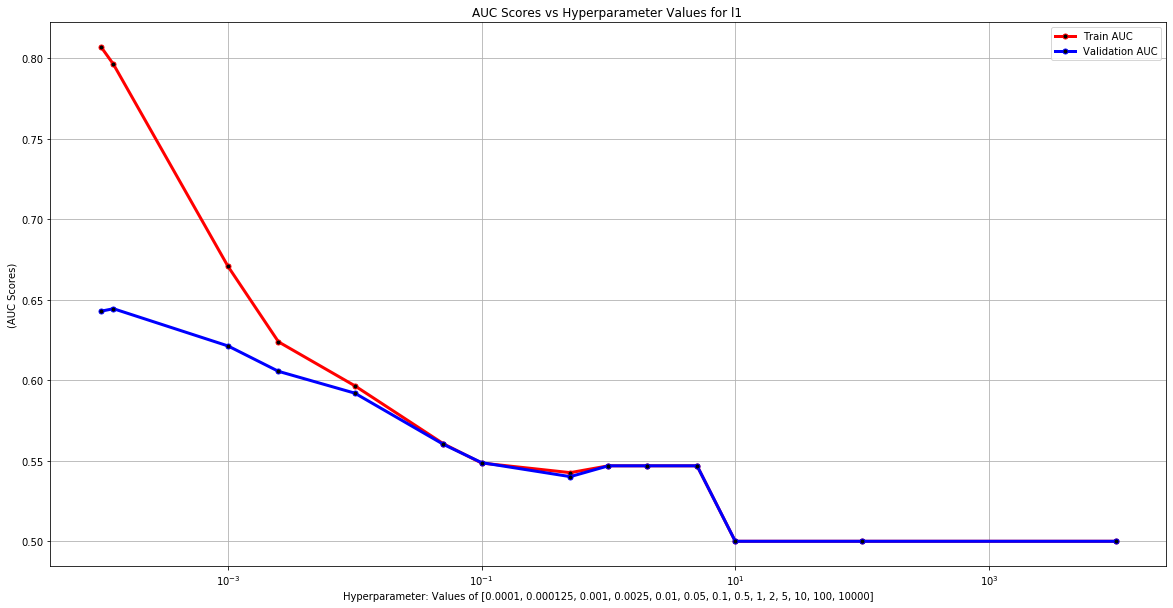

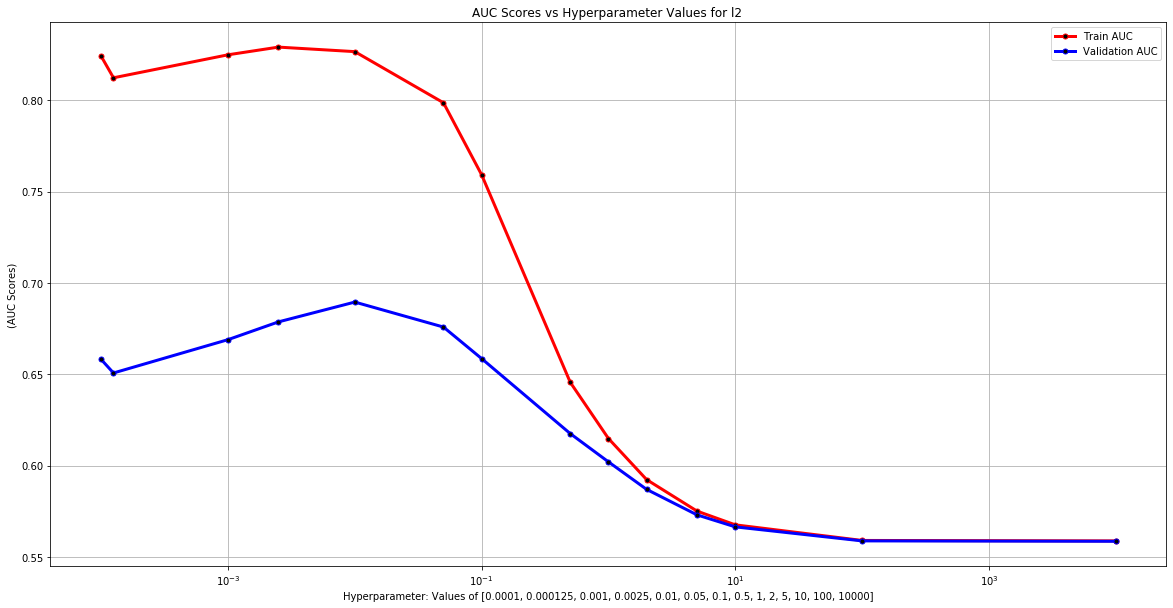

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [62]:
classifier = tune_params_gid(X_tr,y_train)

#### 2.4.1.3 Applying SVM with hinge loss and using CalibratedCV

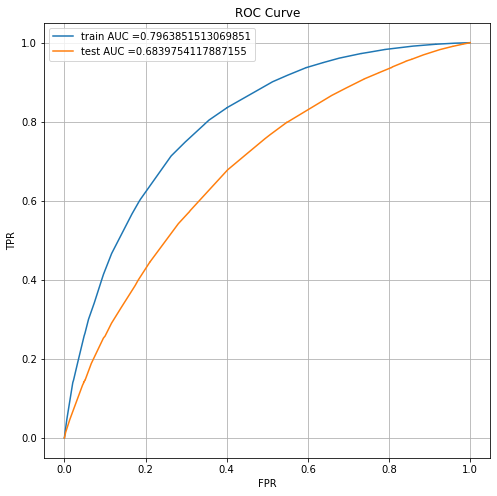

the maximum value of tpr*(1-fpr) 0.5257592433739842 for threshold 0.835


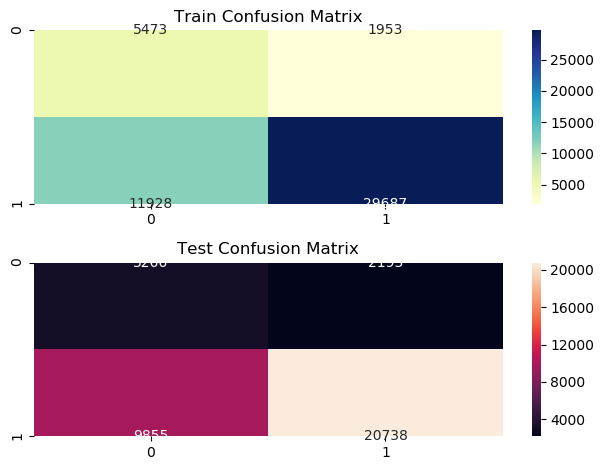

In [63]:
train_auc_bow, test_auc_bow = plot_roc(classifier,X_tr,y_train,X_cr,y_cv,X_te,y_test)

### 2.4.2 Tf-Idf

#### 2.4.2.1 Concatnating matrices

In [64]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_cat_ohe, X_train_subcat_ohe, X_train_essay_tfidf, X_train_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std, X_train_teach_prev_std,X_train_quan_std,X_train_title_cnt_std,X_train_essay_cnt_std,X_train['pos'].values.reshape(-1,1),X_train['neg'].values.reshape(-1,1),X_train['neu'].values.reshape(-1,1),X_train['compound'].values.reshape(-1,1))).tocsr()
X_te = hstack((X_test_cat_ohe, X_test_subcat_ohe, X_test_essay_tfidf, X_test_title_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std, X_test_teach_prev_std,X_test_quan_std,X_test_title_cnt_std,X_test_essay_cnt_std,X_test['pos'].values.reshape(-1,1),X_test['neg'].values.reshape(-1,1),X_test['neu'].values.reshape(-1,1),X_test['compound'].values.reshape(-1,1))).tocsr()
X_cr = hstack((X_cv_cat_ohe, X_cv_subcat_ohe,  X_cv_essay_tfidf, X_cv_title_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std, X_cv_teach_prev_std,X_cv_quan_std,X_cv_title_cnt_std,X_cv_essay_cnt_std,X_cv['pos'].values.reshape(-1,1),X_cv['neg'].values.reshape(-1,1),X_cv['neu'].values.reshape(-1,1),X_cv['compound'].values.reshape(-1,1))).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 14183) (49041,)
(24155, 14183) (24155,)
(36052, 14183) (36052,)


#### 2.4.2.2 HyperParameter Tuning

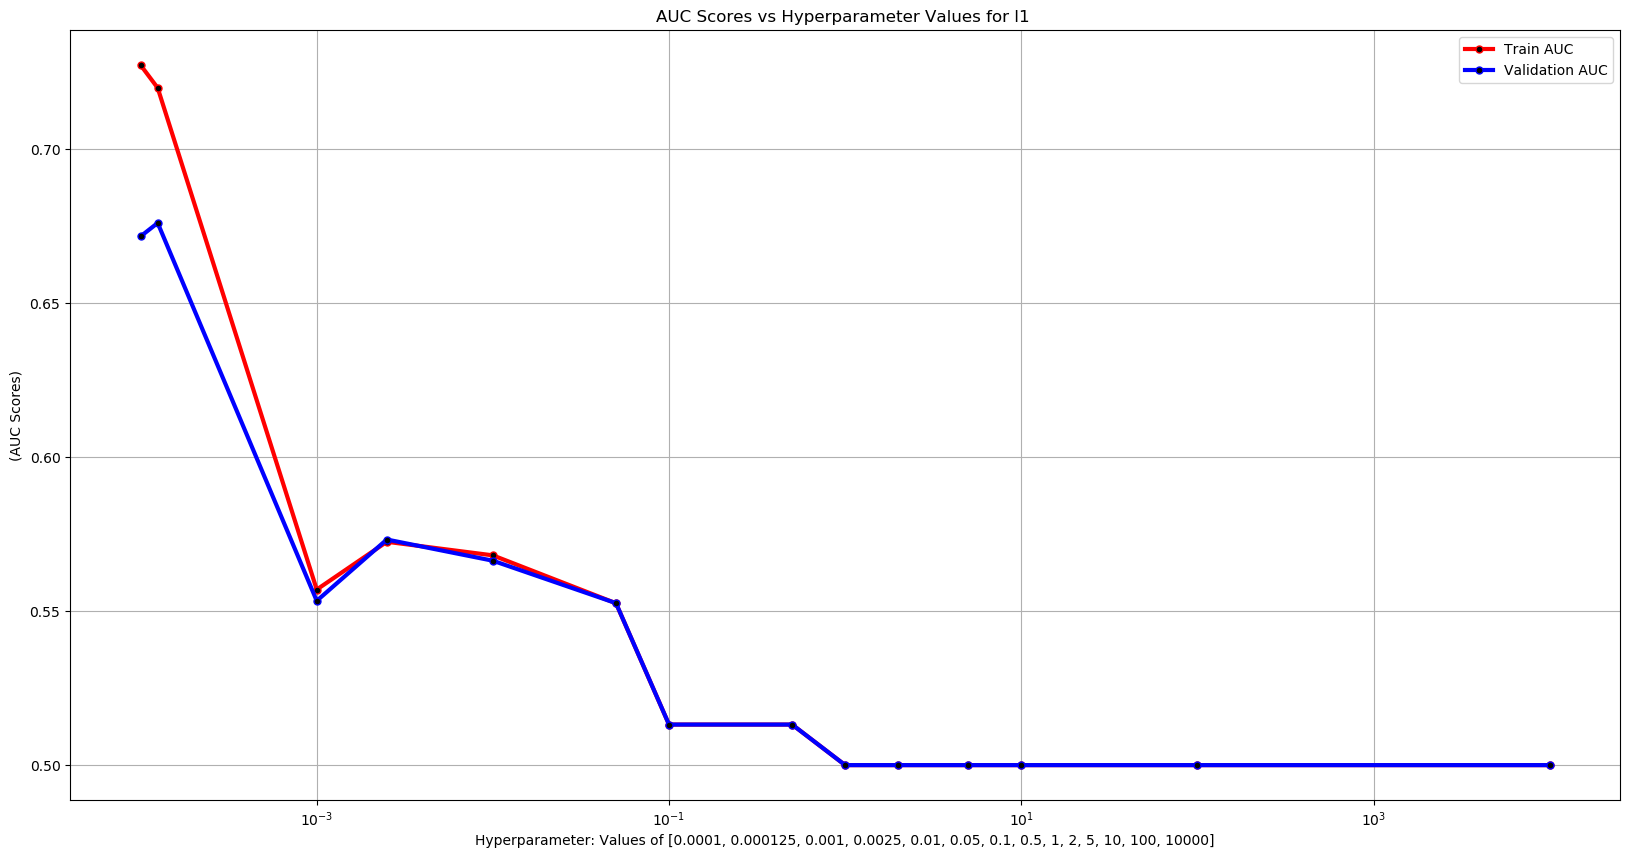

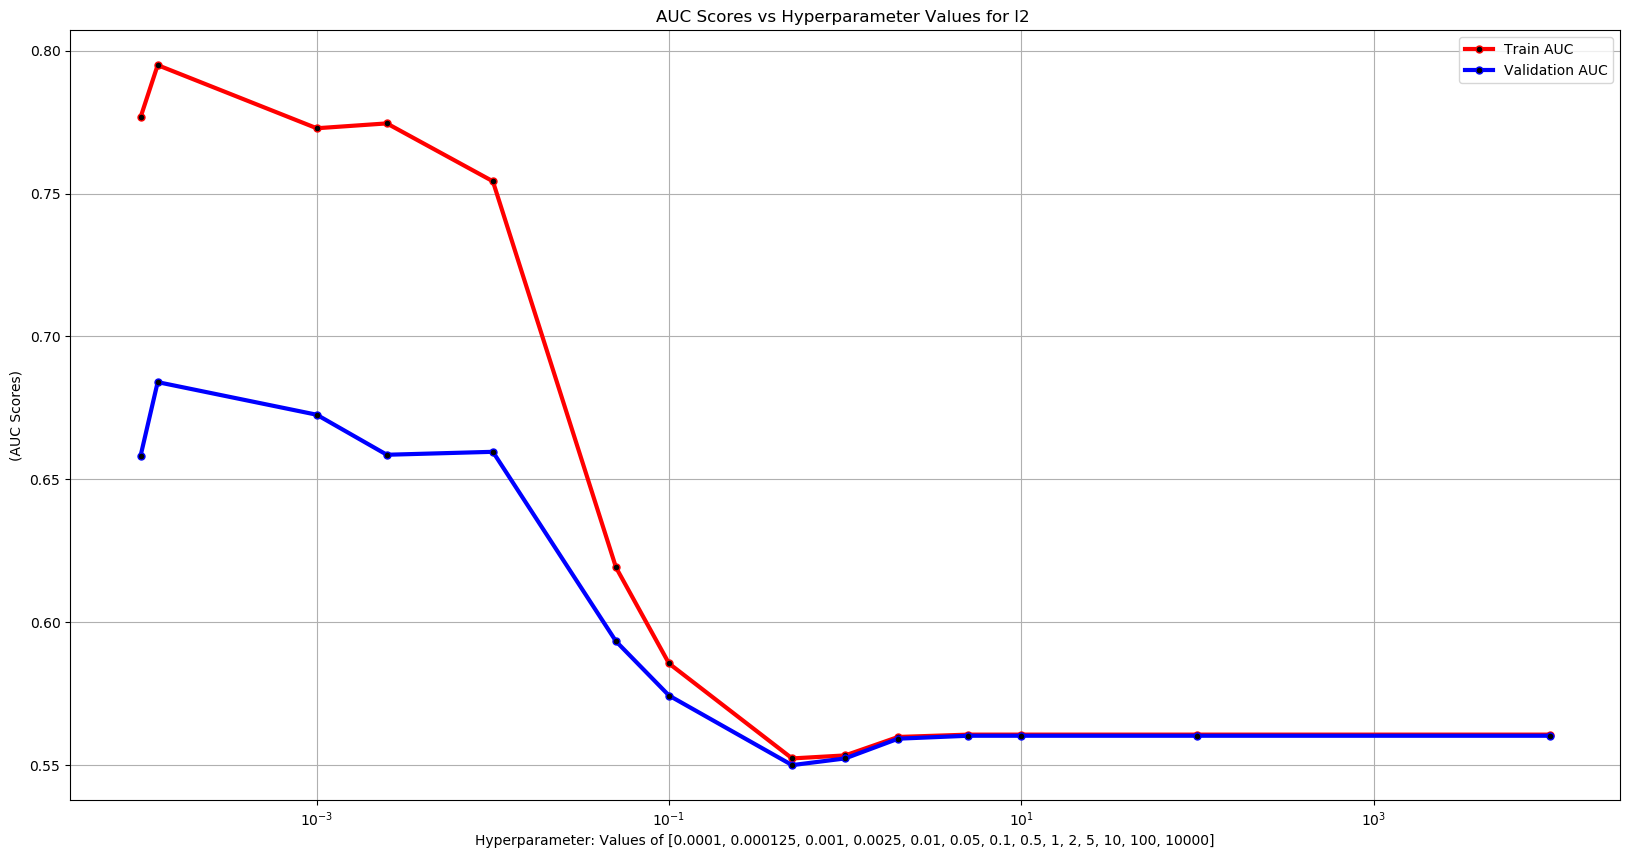

SGDClassifier(alpha=0.000125, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [65]:
classifier = tune_params_gid(X_tr,y_train)

#### 2.4.2.3 Applying SVM with hinge loss and using CalibratedCV

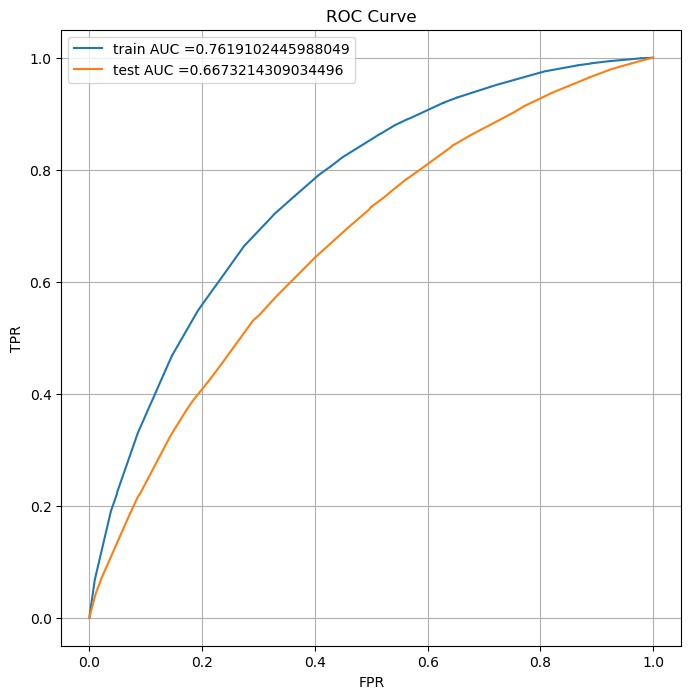

the maximum value of tpr*(1-fpr) 0.48444710061537444 for threshold 0.83


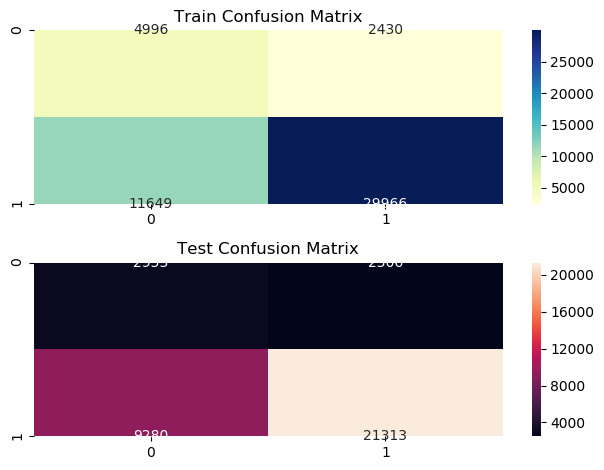

In [66]:
train_auc_tfidf, test_auc_tfidf = plot_roc(classifier,X_tr,y_train,X_cr,y_cv,X_te,y_test)

### 2.4.3 Avg-W2V

#### 2.4.3.1 Concatnating Matrices

In [67]:
X_tr = hstack((X_train_cat_ohe, X_train_subcat_ohe, X_train_essay_avg_w2v, X_train_title_avg_w2v, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std, X_train_teach_prev_std,X_train_quan_std,X_train_title_cnt_std,X_train_essay_cnt_std,X_train['pos'].values.reshape(-1,1),X_train['neg'].values.reshape(-1,1),X_train['neu'].values.reshape(-1,1),X_train['compound'].values.reshape(-1,1))).tocsr()
X_te = hstack((X_test_cat_ohe, X_test_subcat_ohe, X_test_essay_avg_w2v, X_test_title_avg_w2v, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std, X_test_teach_prev_std,X_test_quan_std,X_test_title_cnt_std,X_test_essay_cnt_std,X_test['pos'].values.reshape(-1,1),X_test['neg'].values.reshape(-1,1),X_test['neu'].values.reshape(-1,1),X_test['compound'].values.reshape(-1,1))).tocsr()
X_cr = hstack((X_cv_cat_ohe, X_cv_subcat_ohe,  X_cv_essay_avg_w2v, X_cv_title_avg_w2v, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std, X_cv_teach_prev_std,X_cv_quan_std,X_cv_title_cnt_std,X_cv_essay_cnt_std,X_cv['pos'].values.reshape(-1,1),X_cv['neg'].values.reshape(-1,1),X_cv['neu'].values.reshape(-1,1),X_cv['compound'].values.reshape(-1,1))).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 709) (49041,)
(24155, 709) (24155,)
(36052, 709) (36052,)


#### 2.4.3.2 Concatnating Matrices

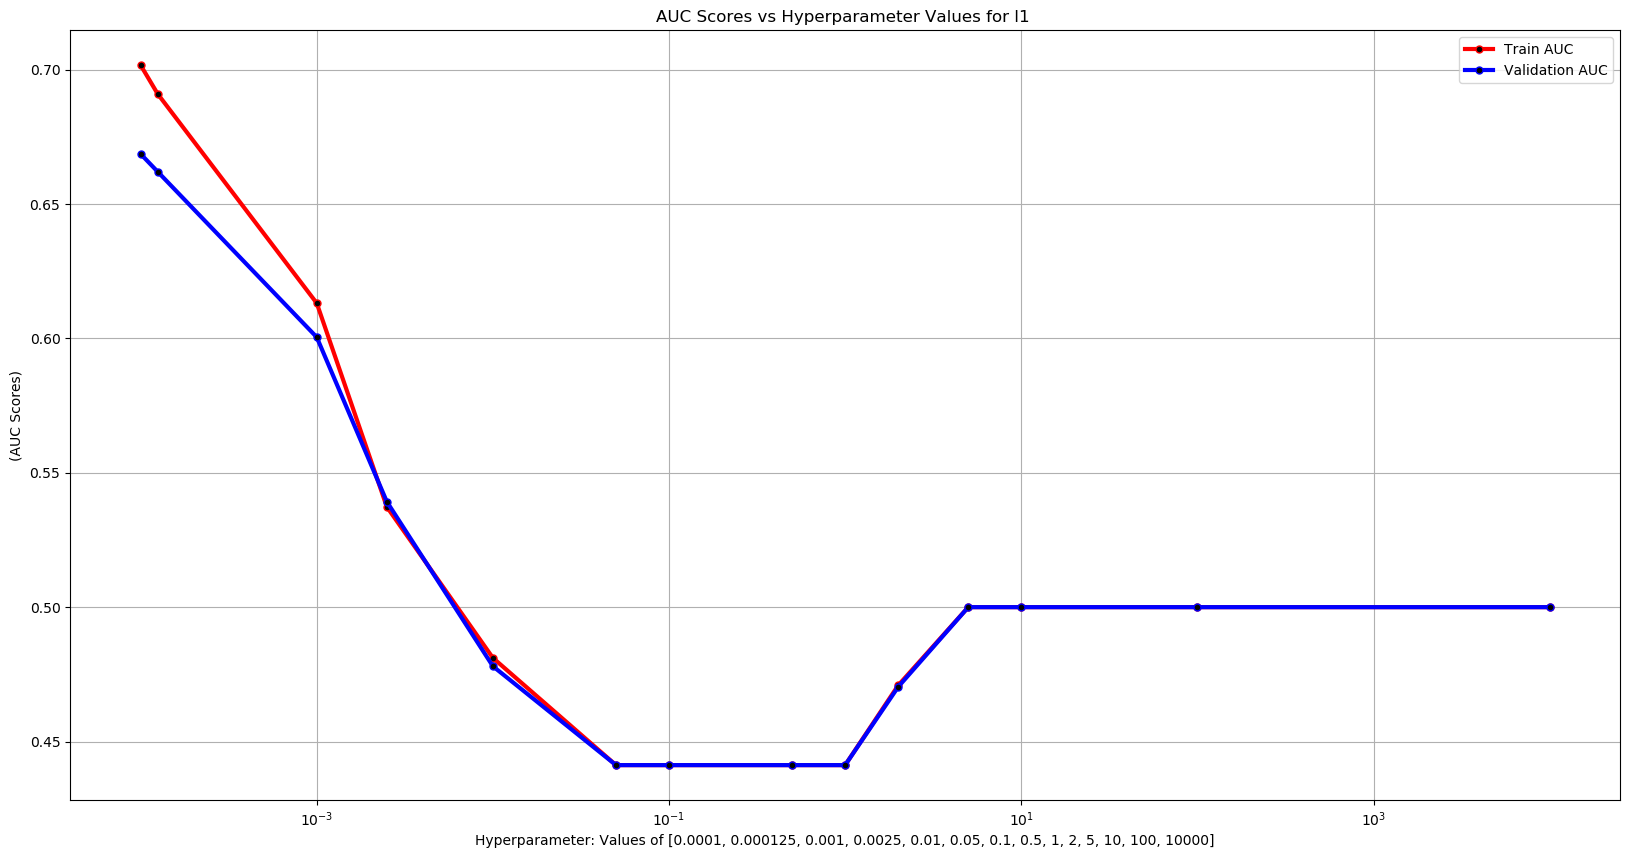

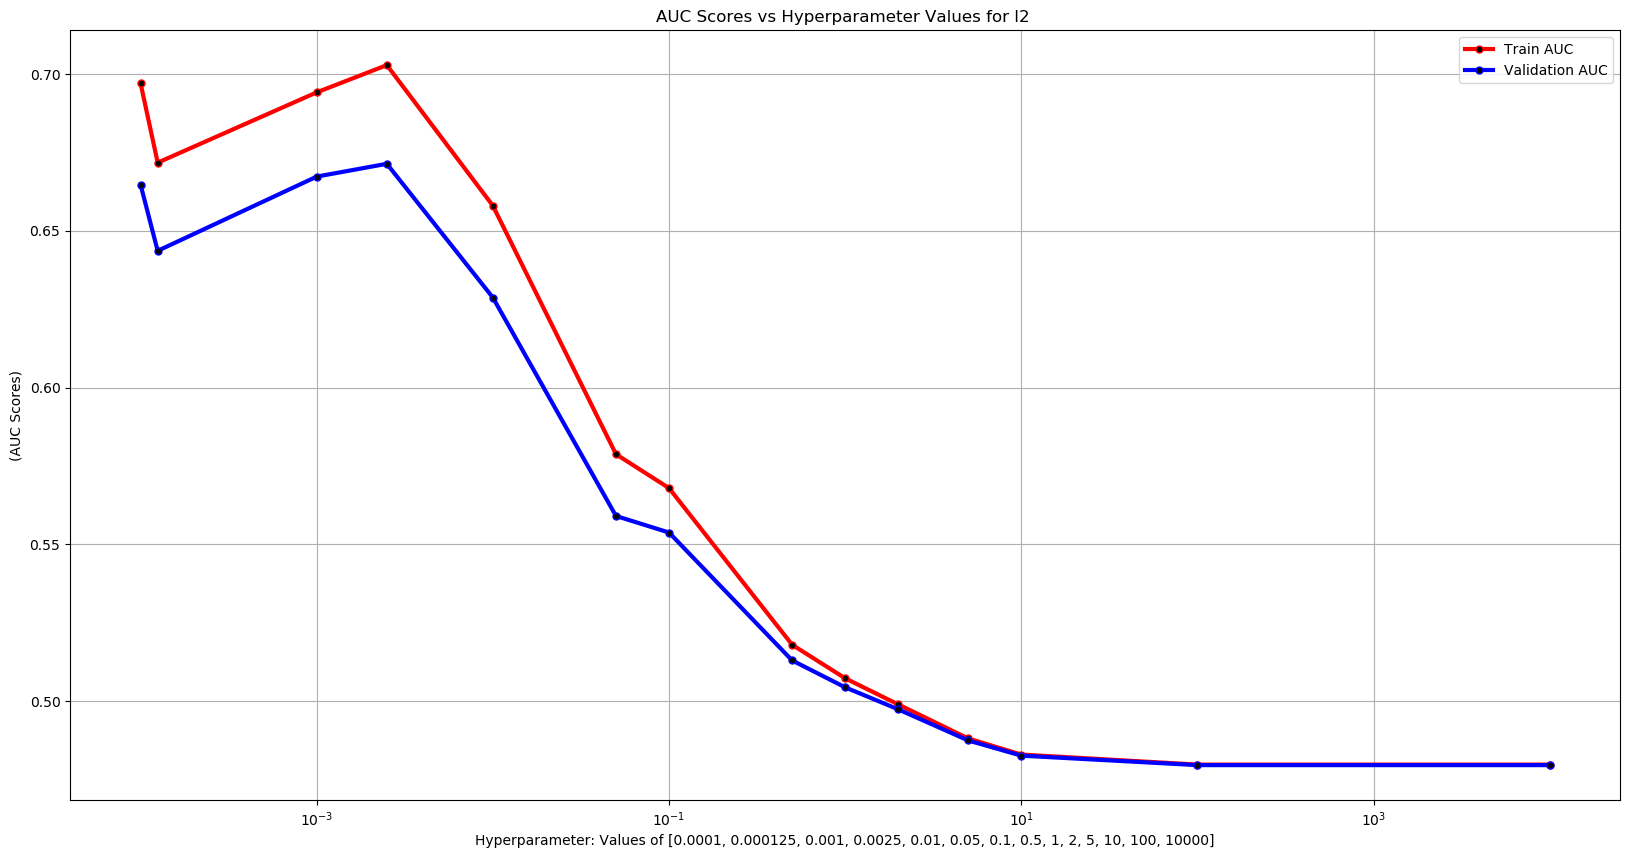

SGDClassifier(alpha=0.0025, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [68]:
classifier = tune_params_gid(X_tr,y_train)

#### 2.4.3.3 Applying SGD with hinge loss and using CalibratedCV

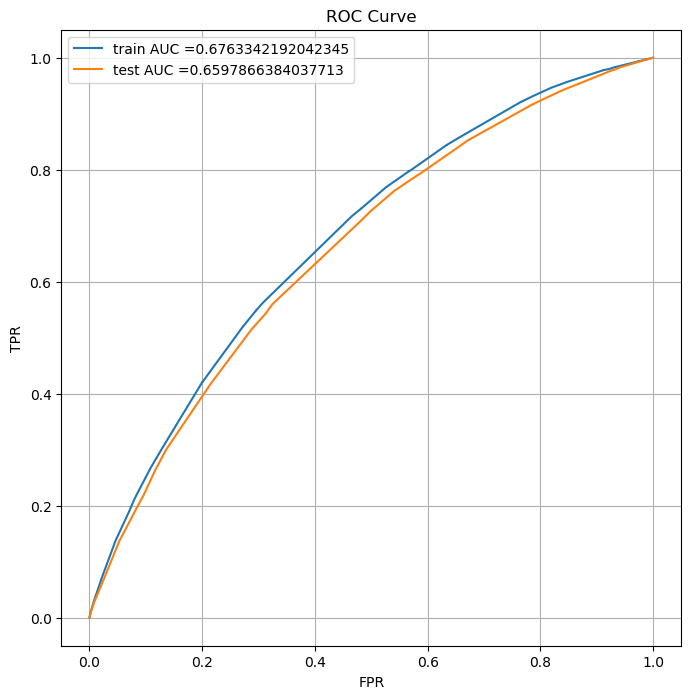

the maximum value of tpr*(1-fpr) 0.3894247730638726 for threshold 0.859


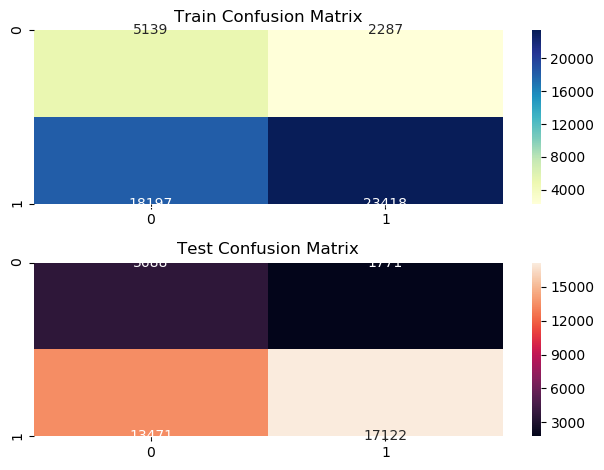

In [69]:
train_auc_avg_w2v, test_auc_avg_w2v = plot_roc(classifier,X_tr,y_train,X_cr,y_cv,X_te,y_test)

### 2.4.4 Tf idf -W2V

#### 2.4.4.1 Concatnating Matrices

In [70]:
X_tr = hstack((X_train_cat_ohe, X_train_subcat_ohe, X_train_essay_tfidf_w2v, X_train_title_tfidf_w2v, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std, X_train_teach_prev_std,X_train_quan_std,X_train_title_cnt_std,X_train_essay_cnt_std,X_train['pos'].values.reshape(-1,1),X_train['neg'].values.reshape(-1,1),X_train['neu'].values.reshape(-1,1),X_train['compound'].values.reshape(-1,1))).tocsr()
X_te = hstack((X_test_cat_ohe, X_test_subcat_ohe, X_test_essay_tfidf_w2v, X_test_title_tfidf_w2v, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std, X_test_teach_prev_std,X_test_quan_std,X_test_title_cnt_std,X_test_essay_cnt_std,X_test['pos'].values.reshape(-1,1),X_test['neg'].values.reshape(-1,1),X_test['neu'].values.reshape(-1,1),X_test['compound'].values.reshape(-1,1))).tocsr()
X_cr = hstack((X_cv_cat_ohe, X_cv_subcat_ohe,  X_cv_essay_tfidf_w2v, X_cv_title_tfidf_w2v, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std, X_cv_teach_prev_std,X_cv_quan_std,X_cv_title_cnt_std,X_cv_essay_cnt_std,X_cv['pos'].values.reshape(-1,1),X_cv['neg'].values.reshape(-1,1),X_cv['neu'].values.reshape(-1,1),X_cv['compound'].values.reshape(-1,1))).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 709) (49041,)
(24155, 709) (24155,)
(36052, 709) (36052,)


#### 2.4.4.2 Parameter Tuning

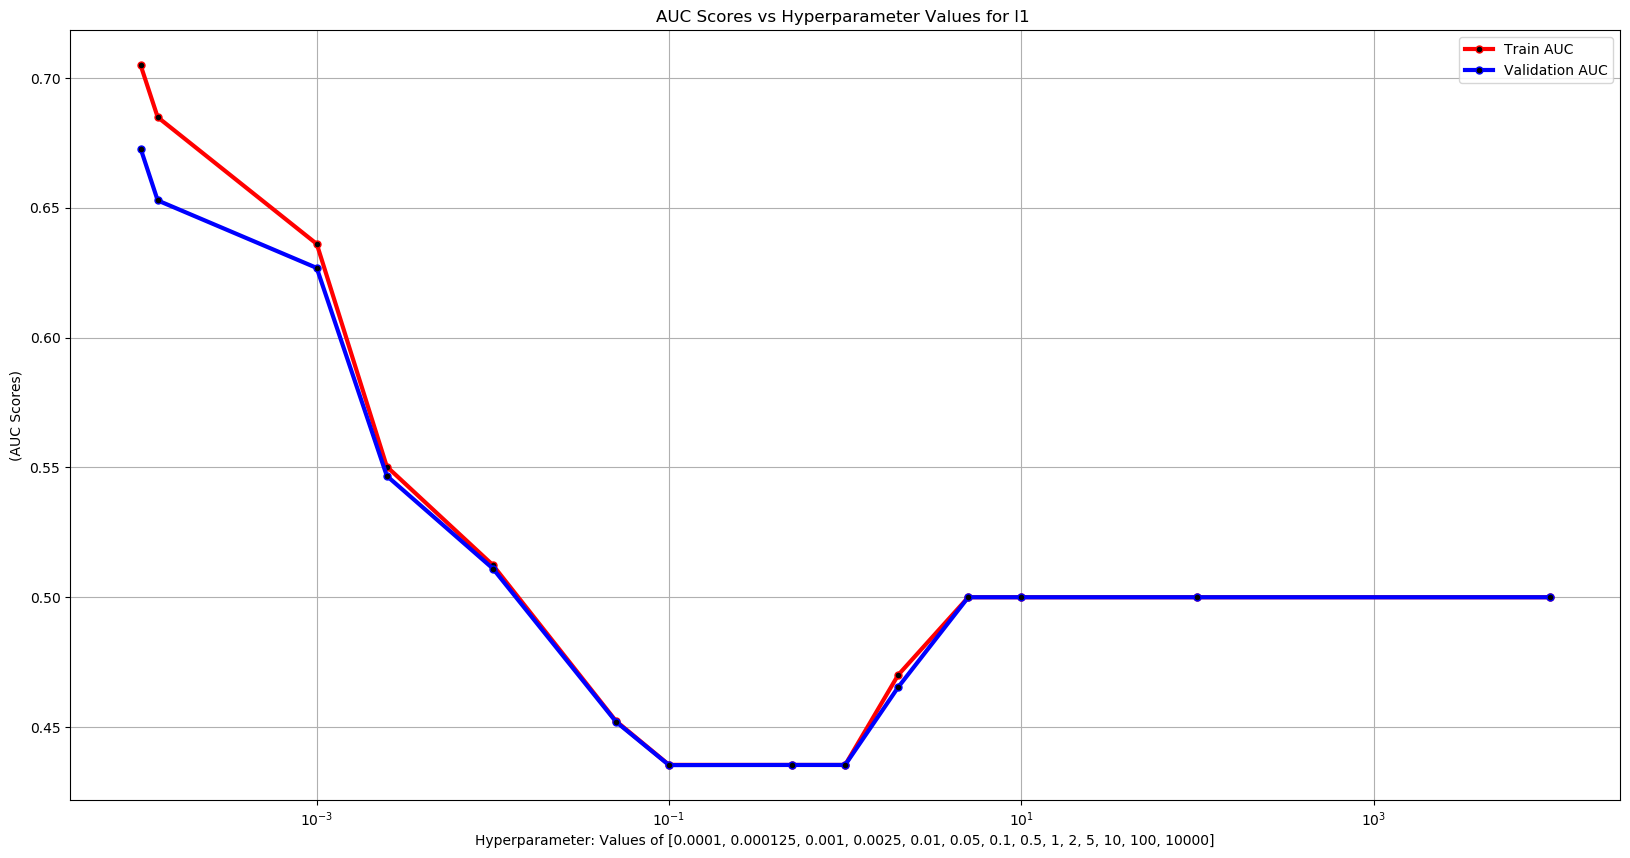

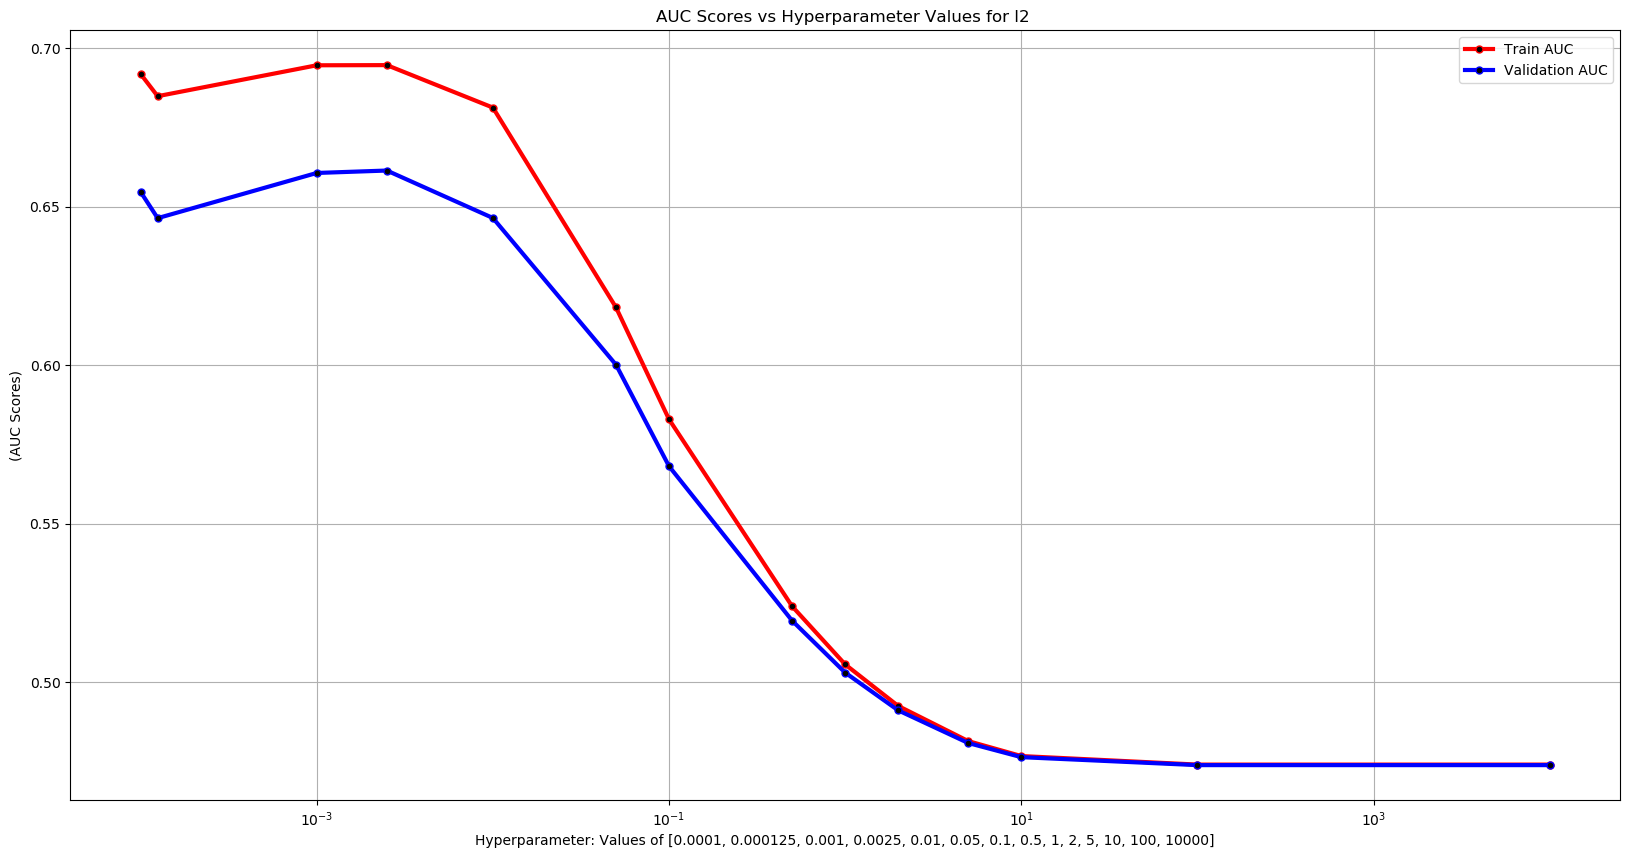

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [71]:
classifier = tune_params_gid(X_tr,y_train)

#### 2.4.4.3 Applying SVM with hinge loss and using CalibratedCV

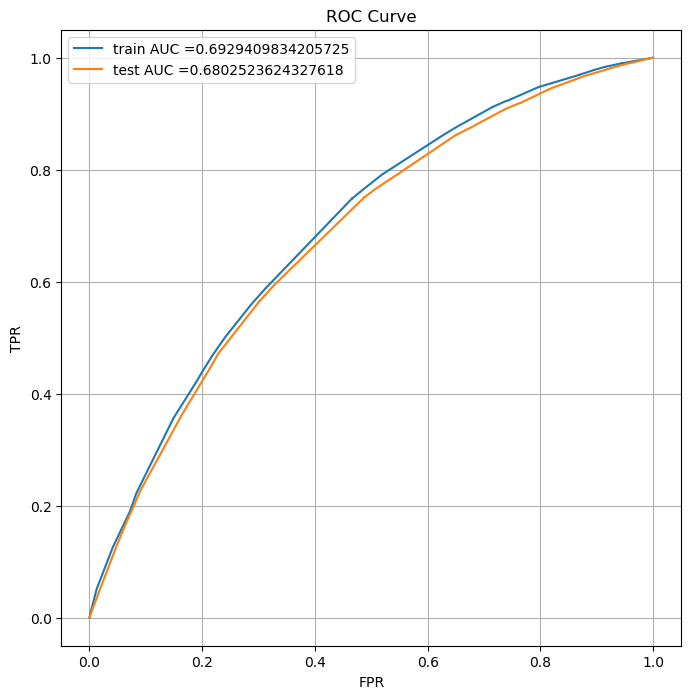

the maximum value of tpr*(1-fpr) 0.40460312020409206 for threshold 0.854


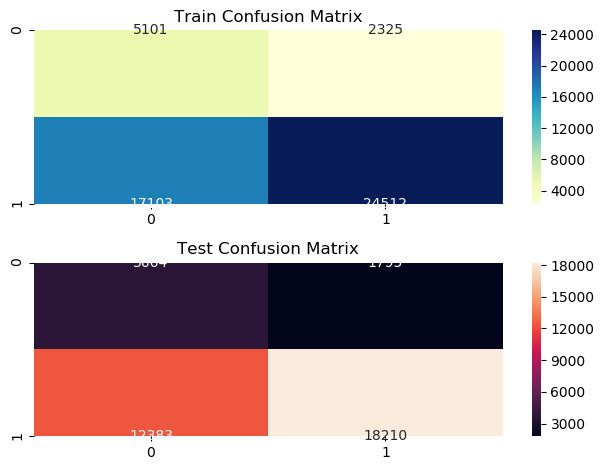

In [72]:
train_auc_tfidf_w2v, test_auc_tfidf_w2v = plot_roc(classifier,X_tr,y_train,X_cr,y_cv,X_te,y_test)

In [75]:
with open("train_test_auc.pickle", 'wb') as f:
    pickle.dump({'train':[train_auc_bow, train_auc_tfidf,train_auc_avg_w2v, train_auc_tfidf_w2v], 'test': [test_auc_bow, test_auc_tfidf,test_auc_avg_w2v, test_auc_tfidf_w2v]},f)

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

### 2.5.1 Vectorizing the essays with tfidf with 4000 features

In [76]:
vectorizer = TfidfVectorizer(min_df=10,max_features=4000)
X_train_essay_tfidf = vectorizer.fit_transform(X_train['essay'])
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'])
X_test_essay_tfidf = vectorizer.transform(X_test['essay'])

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

print("="*100)

After vectorizations
(49041, 4000) (49041,)
(24155, 4000) (24155,)
(36052, 4000) (36052,)


### 2.5.2 Applying Truncated SVD and Visualizing using elbow method

In [77]:
from sklearn.decomposition import TruncatedSVD

tvsd = TruncatedSVD(n_components=3999)
train_idf = tvsd.fit_transform(X_train_essay_tfidf)
var_exp = tvsd.explained_variance_ / sum(tvsd.explained_variance_)
cum_var_exp = np.cumsum(var_exp)
cv_idf = tvsd.transform(X_cv_essay_tfidf)
test_idf = tvsd.transform(X_test_essay_tfidf)



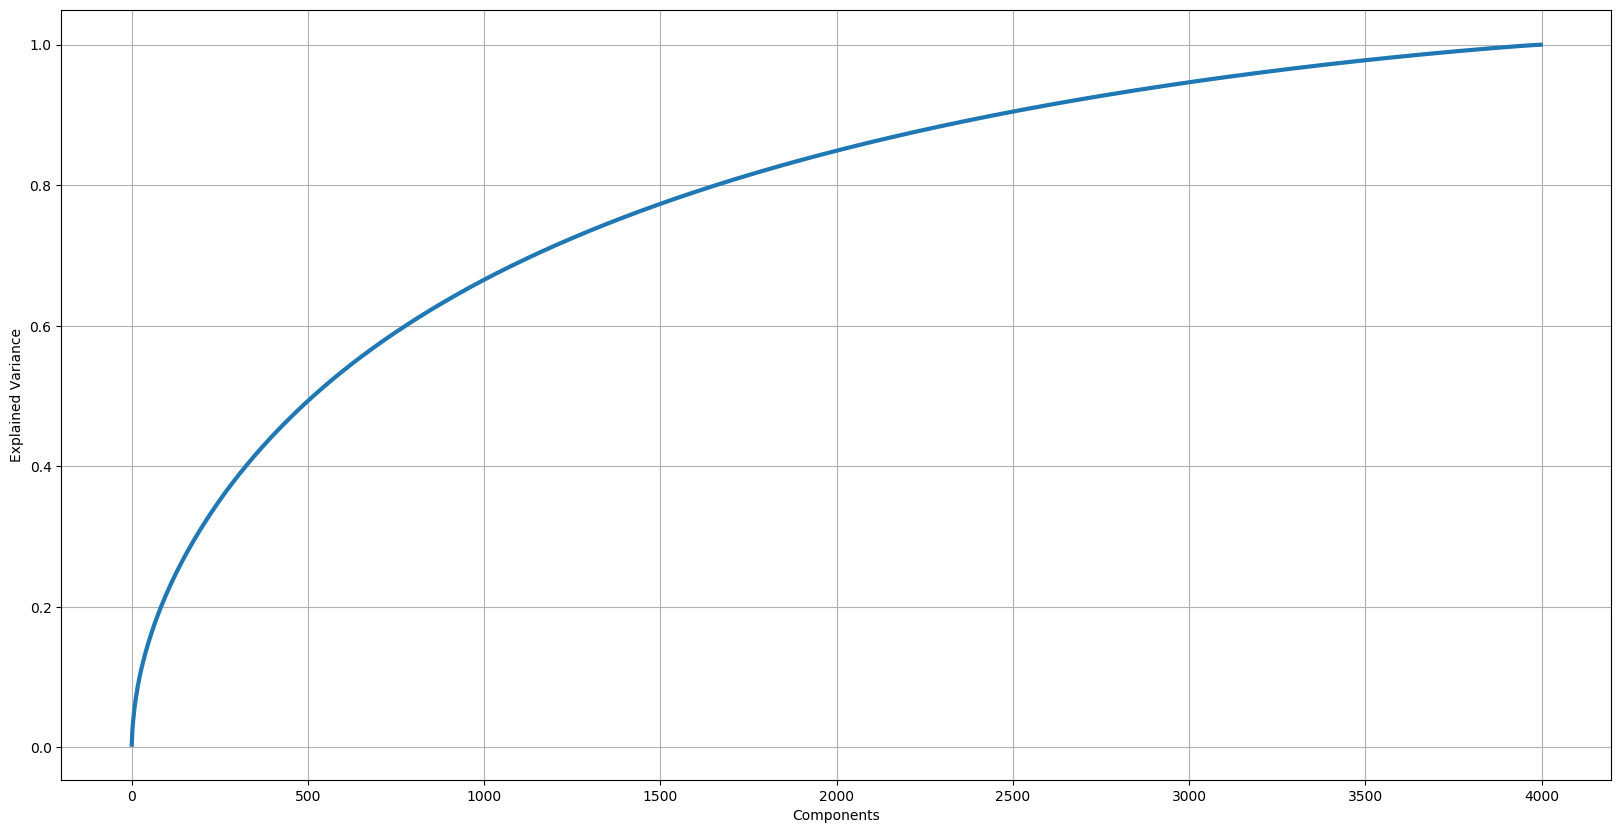

In [78]:

plt.figure(figsize=(20,10))
plt.plot(cum_var_exp,linewidth = 3)
plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.grid()
plt.show()

As we see for 4000 dimensions we don't see a proper elbow shape,and increasing the dimension further leads to RAM issues hence sticking to 4000 features only.

### 2.5.3 Transforming the test and cv split 

from sklearn.decomposition import TruncatedSVD
tvsd = TruncatedSVD(n_components=1999)
train_idf = tvsd.fit_transform(X_train_essay_tfidf)
cv_idf = tvsd.transform(X_cv_essay_tfidf)
test_idf = tvsd.transform(X_test_essay_tfidf)



In [ ]:
from scipy.sparse import hstack

X_cr = hstack((X_cv_cat_ohe, X_cv_subcat_ohe,  sparse.csr_matrix(cv_idf), X_cv_title_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std, X_cv_teach_prev_std,X_cv_quan_std,X_cv_title_cnt_std,X_cv_essay_cnt_std,X_cv['pos'].values.reshape(-1,1),X_cv['neg'].values.reshape(-1,1),X_cv['neu'].values.reshape(-1,1),X_cv['compound'].values.reshape(-1,1))).tocsr()
X_tr = hstack((X_train_cat_ohe, X_train_subcat_ohe, sparse.csr_matrix(train_idf), X_train_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std, X_train_teach_prev_std,X_train_quan_std,X_train_title_cnt_std,X_train_essay_cnt_std,X_train['pos'].values.reshape(-1,1),X_train['neg'].values.reshape(-1,1),X_train['neu'].values.reshape(-1,1),X_train['compound'].values.reshape(-1,1))).tocsr()
X_te = hstack((X_test_cat_ohe, X_test_subcat_ohe, sparse.csr_matrix(test_idf), X_test_title_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std, X_test_teach_prev_std,X_test_quan_std,X_test_title_cnt_std,X_test_essay_cnt_std,X_test['pos'].values.reshape(-1,1),X_test['neg'].values.reshape(-1,1),X_test['neu'].values.reshape(-1,1),X_test['compound'].values.reshape(-1,1))).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

### 2.5.4 HyperParameter Tuning

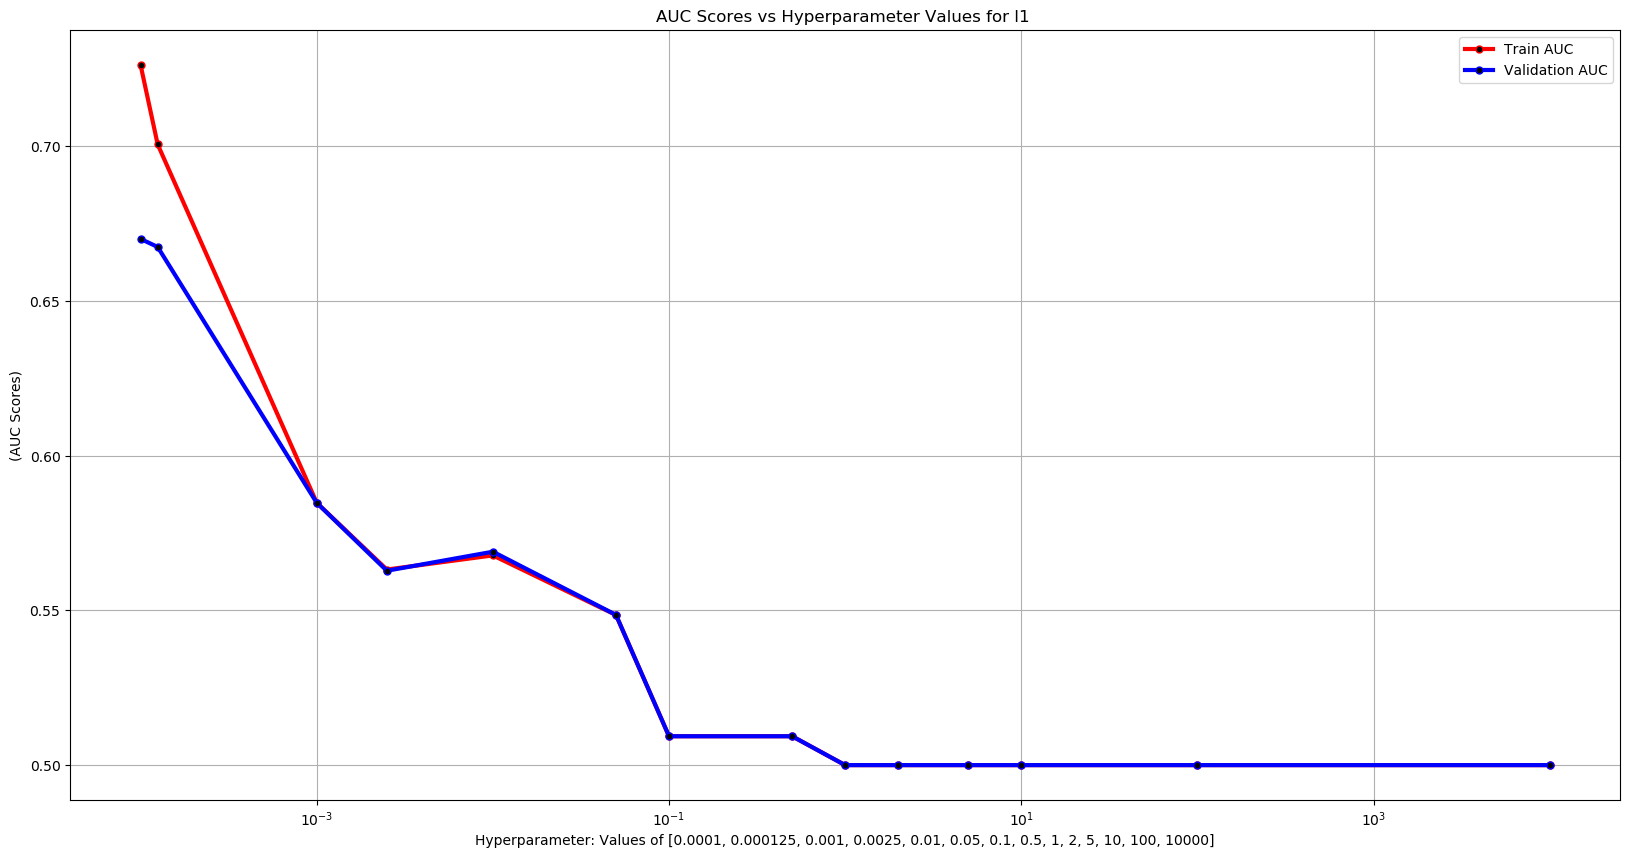

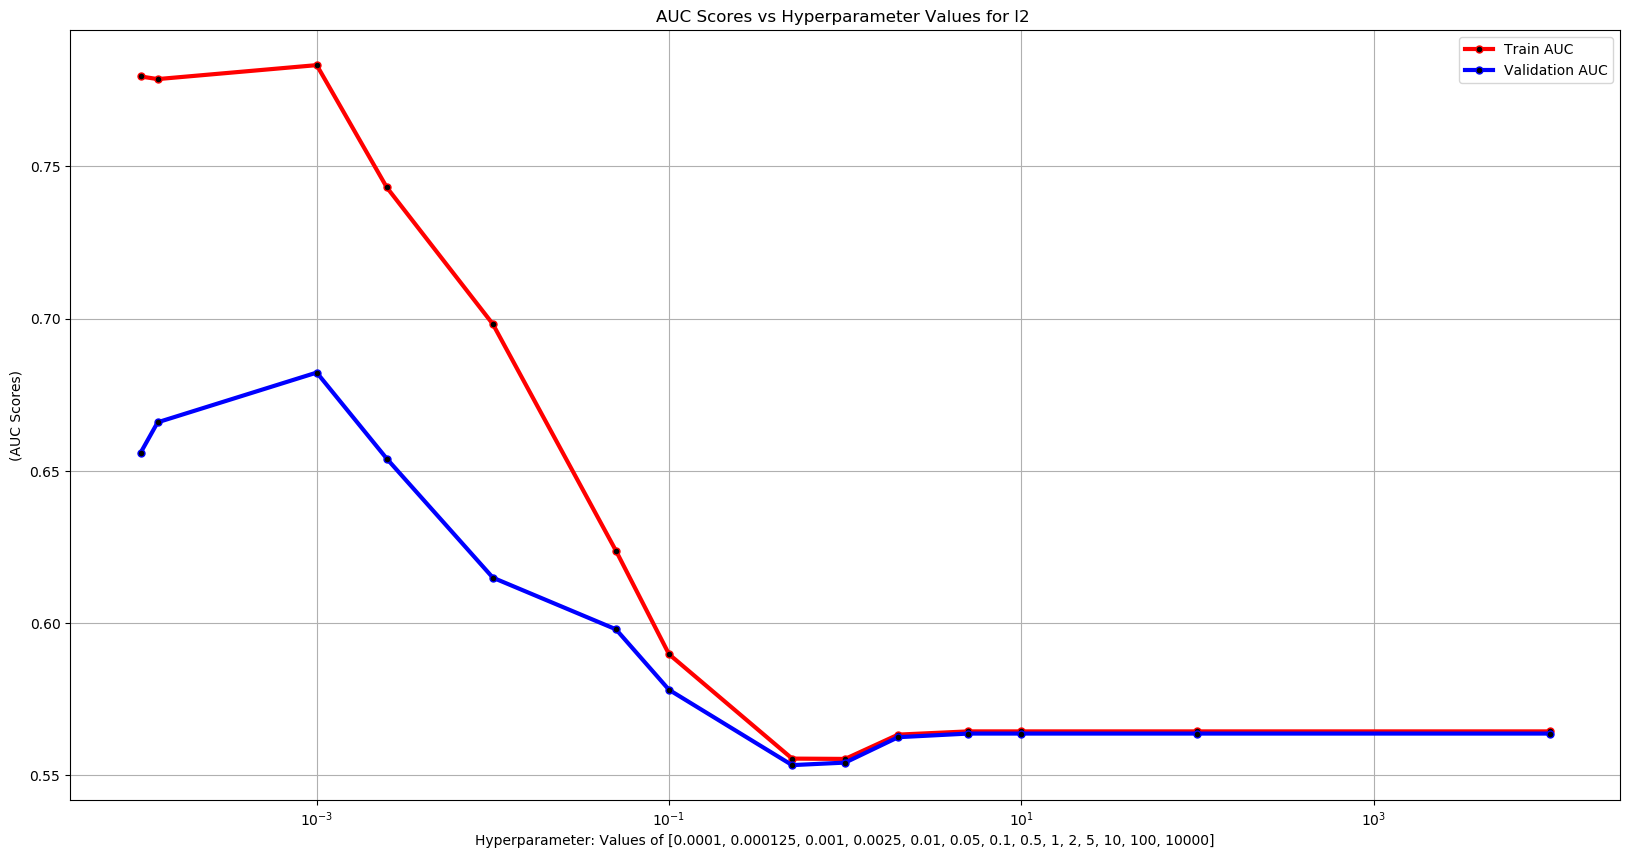

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [136]:
classifier = tune_params_gid(X_tr,y_train)

### 2.5.6 Applying SGD with hinge loss and using CalibratedCV

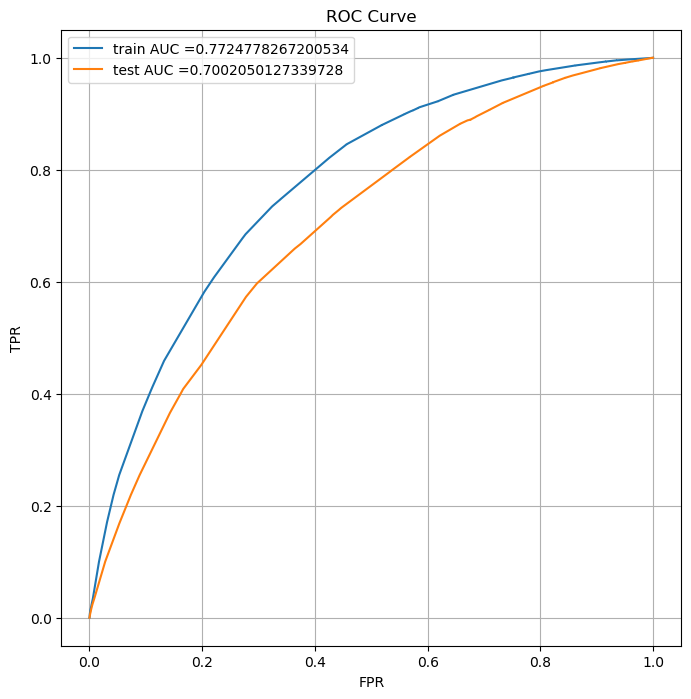

the maximum value of tpr*(1-fpr) 0.4964396196017778 for threshold 0.834


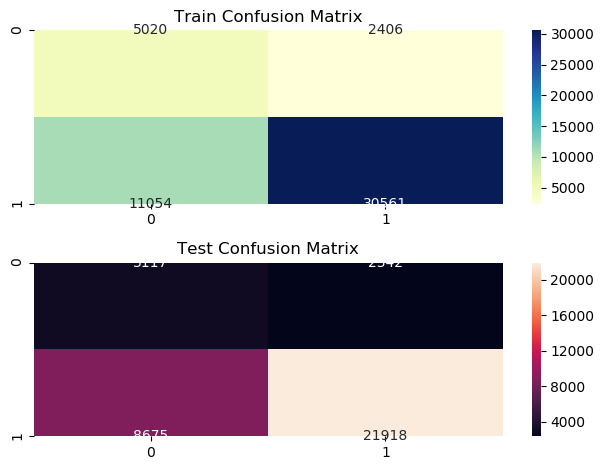

In [137]:
train_auc_svd, test_auc_svd = plot_roc(classifier,X_tr,y_train,X_cr,y_cv,X_te,y_test)

<h1>3. Conclusion</h1>

In [4]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
pt = PrettyTable(["Model", "Train AUC", "Test AUC","Alpha","Penalty"])
pt.add_row(["Bag Of Words", train_auc_bow, test_auc_bow,0.0025,"l2"])
pt.add_row(["Tf-Idf", train_auc_tfidf, test_auc_tfidf, 0.000125,"l1"])
pt.add_row(["Average W2V", train_auc_avg_w2v, test_auc_avg_w2v, 0.0001,"l1"])
pt.add_row(["TfIdf W2V", train_auc_tfidf_w2v, test_auc_tfidf_w2v, 0.0025,"l2"])
pt.add_row(["Tf-Idf TSVD", train_auc_svd, test_auc_svd, 0.001,"l2"])

print(pt)

+--------------+--------------------+--------------------+----------+---------+
|    Model     |     Train AUC      |      Test AUC      |  Alpha   | Penalty |
+--------------+--------------------+--------------------+----------+---------+
| Bag Of Words | 0.7963851513069851 | 0.6839754117887155 |  0.0025  |    l2   |
|    Tf-Idf    | 0.7619102445988049 | 0.6673214309034496 | 0.000125 |    l1   |
| Average W2V  | 0.6763342192042345 | 0.6597866384037713 |  0.0001  |    l1   |
|  TfIdf W2V   | 0.6929409834205725 | 0.6802523624327618 |  0.0025  |    l2   |
| Tf-Idf TSVD  | 0.7724778267200534 | 0.7002050127339728 |  0.001   |    l2   |
+--------------+--------------------+--------------------+----------+---------+


1. We see that for SVM with tfidf vectorizer and dimensionality reduced to 4000 features using TSVD, the model performs the best amongst all for Test AUC

2. For train AUC, bow performs the best.